## PyTorch Tutorial 13 - Feed-Forward Neural Network

https://www.youtube.com/watch?v=oPhxf2fXHkQ

In [1]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model Evaluation
# GPU Support

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [28]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"device:{device}")
# hyper parameters
input_size = 784 # 28 x 28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root = "./data", 
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = "./data", 
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          download= True)

# we shuffle
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = batch_size,
                                          shuffle = True)

# we dont shuffle
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                           batch_size = batch_size,
                                          shuffle = False)



device:cpu


####  Let us look as one batch of data

In [29]:
examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


Explaining torch.Size([100, 1, 28, 28]) torch.Size([100])

1. Since we put batch size of 100, so one fetch using .next gets us 100 samples

2. Next is colour channels, which is 1 in this case - we do not have anu colour channel

3. 28x28 is actual image array

4. torch.Size([100]): for each data bach we have 100 labels

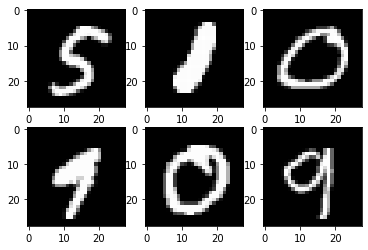

In [30]:
for i in range(6):
    # 2 rows and three columns
    plt.subplot(2, 3, i + 1)
    # i th sample 
    # 0: because we want to access first channel(we have only one)
    # cmap: colour map
    plt.imshow(samples[i][0], cmap="gray")  

We see digits above. To train we need to make a fully connected neural network


In [31]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no softmax at the end
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()  #applies softmax
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#trainign loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # we have to reshape the image : 100, 1 , 28, 28
        # we need 100, 784   (784 = 28 x 28)
        images = images.reshape(-1, 28 * 28).to(device) #pushes to gpu if avilable
        lables = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i + 1)% 100 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_total_steps} loss={loss.item():.4f}')
            
        
        


epoch 1/5, step 100/600 loss=0.5364
epoch 1/5, step 200/600 loss=0.3560
epoch 1/5, step 300/600 loss=0.3742
epoch 1/5, step 400/600 loss=0.3585
epoch 1/5, step 500/600 loss=0.2460
epoch 1/5, step 600/600 loss=0.2779
epoch 2/5, step 100/600 loss=0.1845
epoch 2/5, step 200/600 loss=0.1652
epoch 2/5, step 300/600 loss=0.2138
epoch 2/5, step 400/600 loss=0.1291
epoch 2/5, step 500/600 loss=0.1784
epoch 2/5, step 600/600 loss=0.1725
epoch 3/5, step 100/600 loss=0.2510
epoch 3/5, step 200/600 loss=0.2125
epoch 3/5, step 300/600 loss=0.1223
epoch 3/5, step 400/600 loss=0.1560
epoch 3/5, step 500/600 loss=0.0866
epoch 3/5, step 600/600 loss=0.0967
epoch 4/5, step 100/600 loss=0.1600
epoch 4/5, step 200/600 loss=0.1043
epoch 4/5, step 300/600 loss=0.0531
epoch 4/5, step 400/600 loss=0.2106
epoch 4/5, step 500/600 loss=0.1052
epoch 4/5, step 600/600 loss=0.1103
epoch 5/5, step 100/600 loss=0.0865
epoch 5/5, step 200/600 loss=0.2142
epoch 5/5, step 300/600 loss=0.0965
epoch 5/5, step 400/600 loss

#### We are done with training above - now lets do  testing

In [32]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device) #pushes to gpu if avilable
        lables = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct/n_samples
    print(f'accuracy = {acc}')

accuracy = 0.97
